In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("PMTPositions_Scan.txt") as file:
    pmtpositions = np.array([[float(v) for v in line.rstrip().split("	")[2:5]] for line in file])
with open("PMTPositions_Scan.txt") as file:
    detkeys = np.array([int(line.rstrip().split("	")[0]) for line in file])
    
combined = np.array([np.array((*pmtpositions[i], detkeys[i])) for i in range(len(pmtpositions))])

Text(0, 0.5, 'y [cm]')

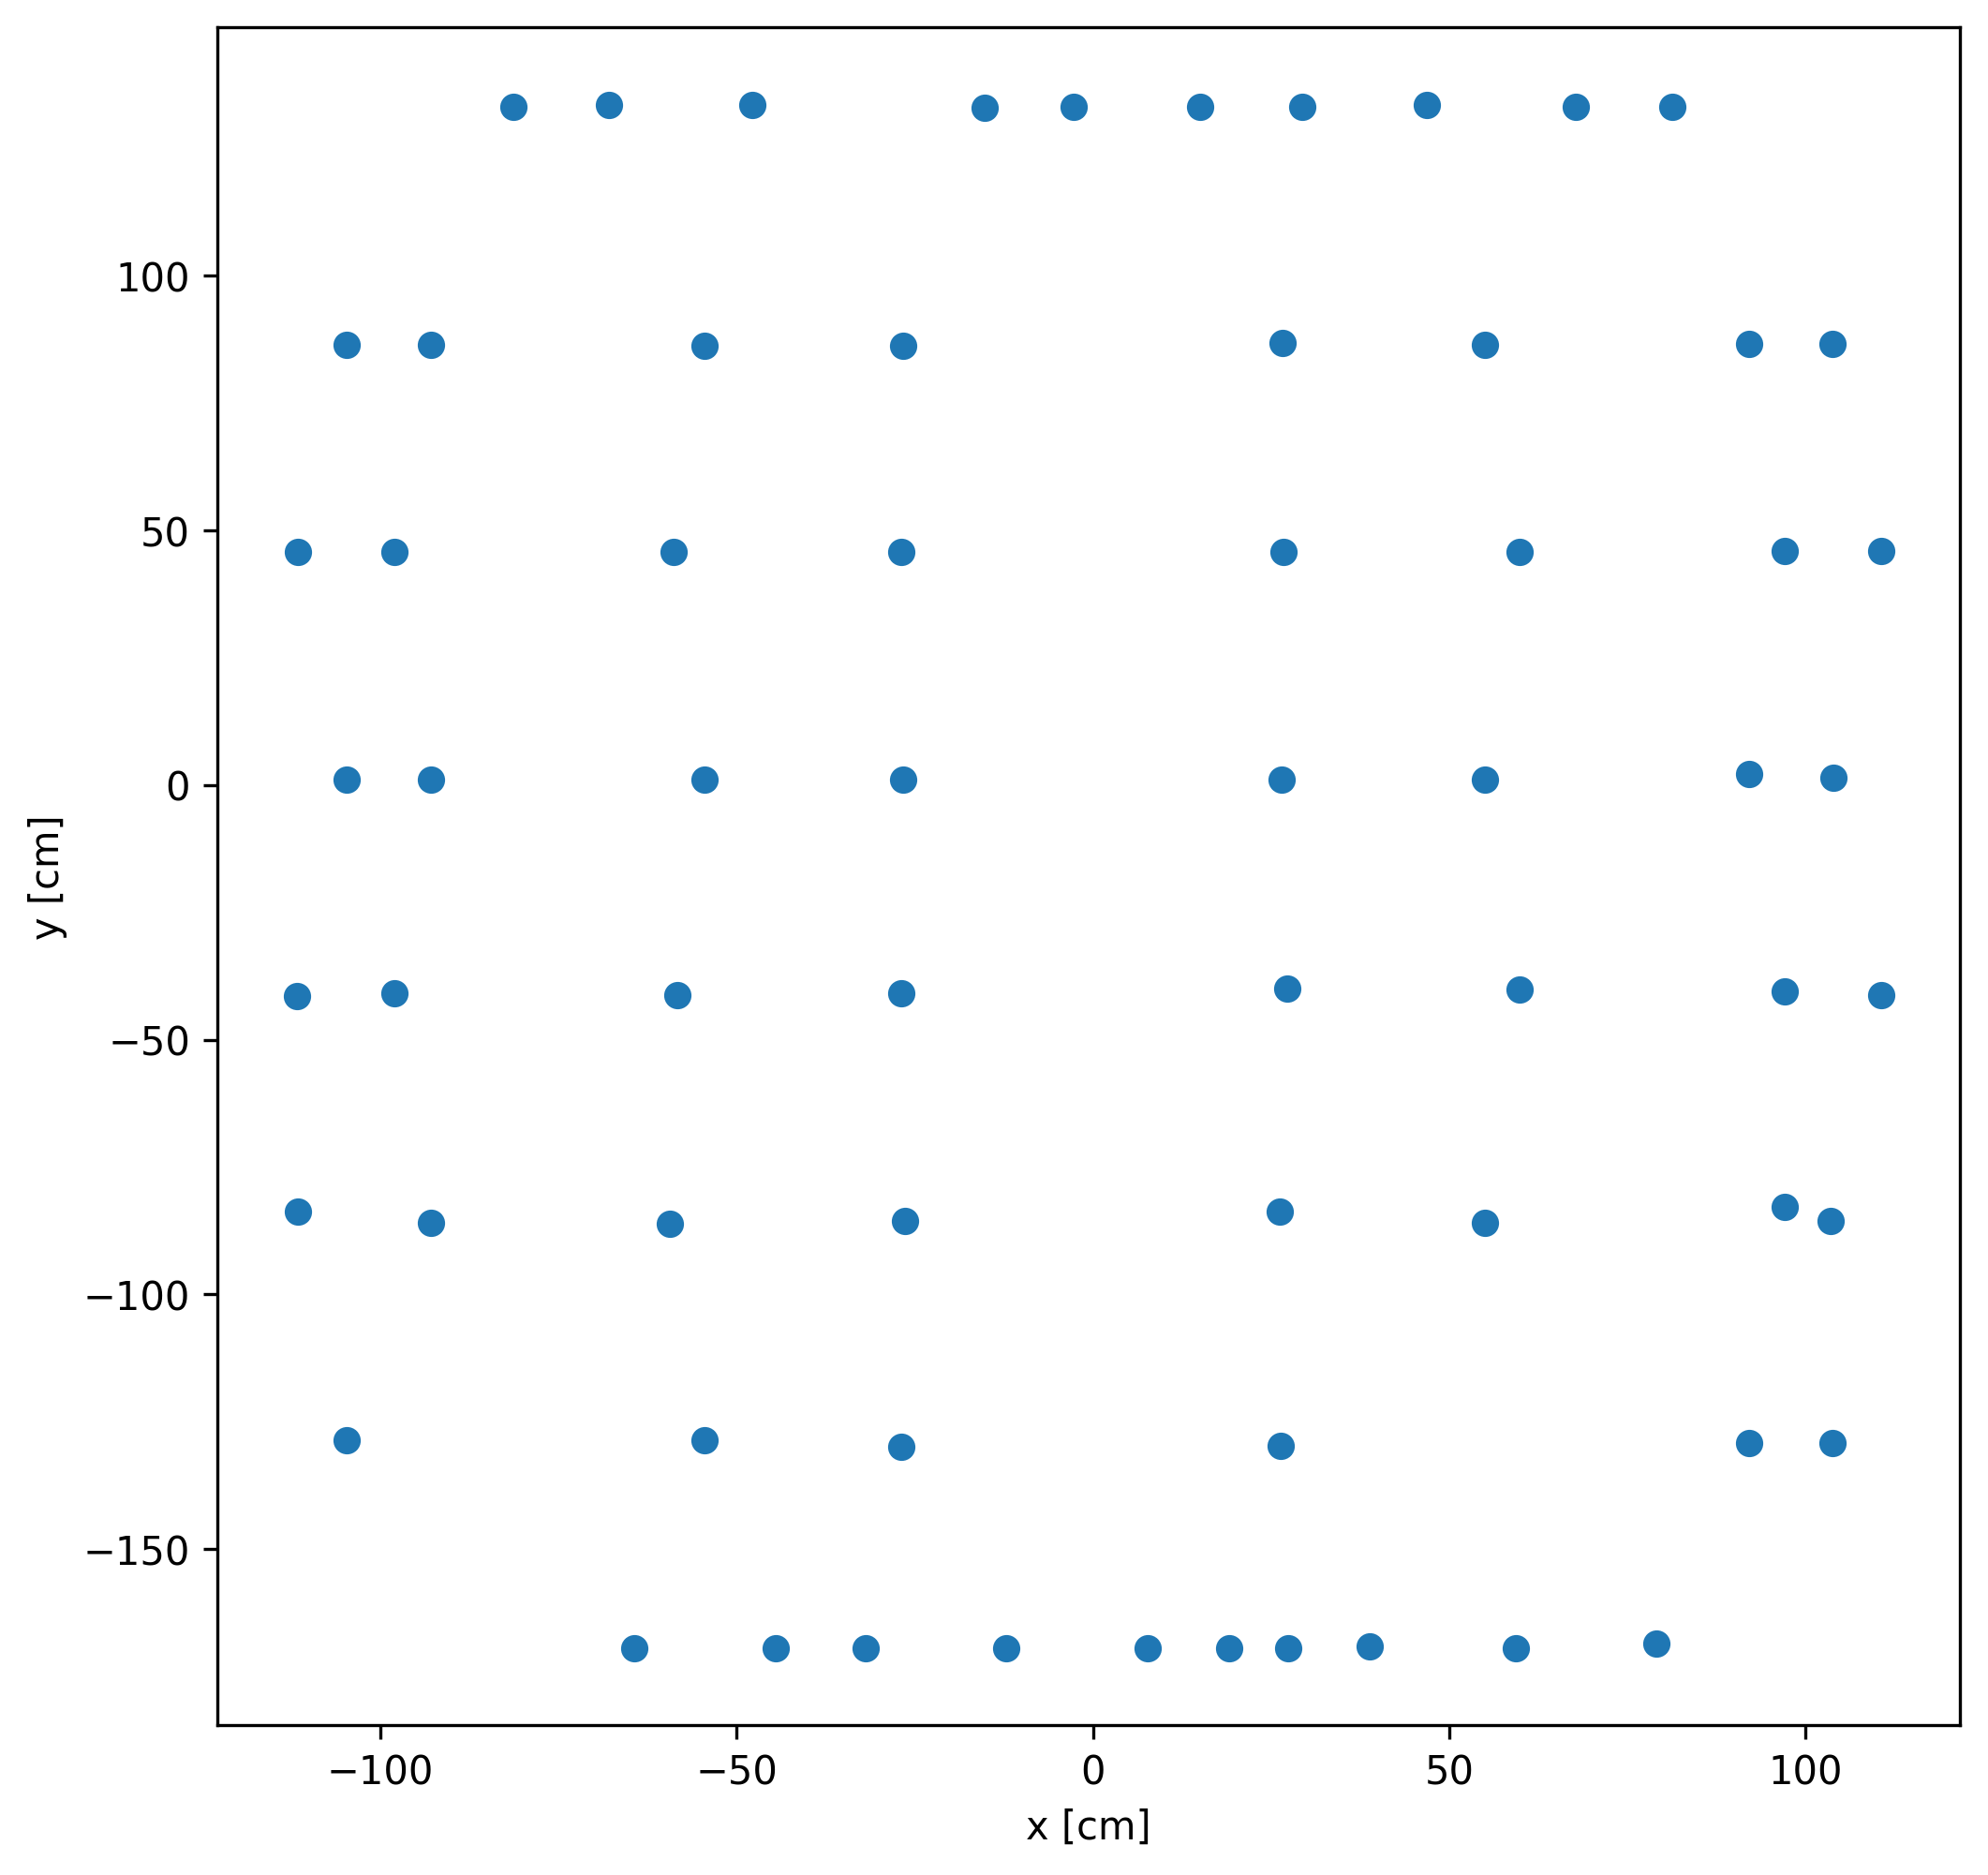

In [6]:
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

a.scatter(pmtpositions[pmtpositions[:,2] >= 168.1][:,0], pmtpositions[pmtpositions[:,2] >= 168.1][:,1])

a.set_xlabel("x [cm]")
a.set_ylabel("y [cm]")

NameError: name 'ybins' is not defined

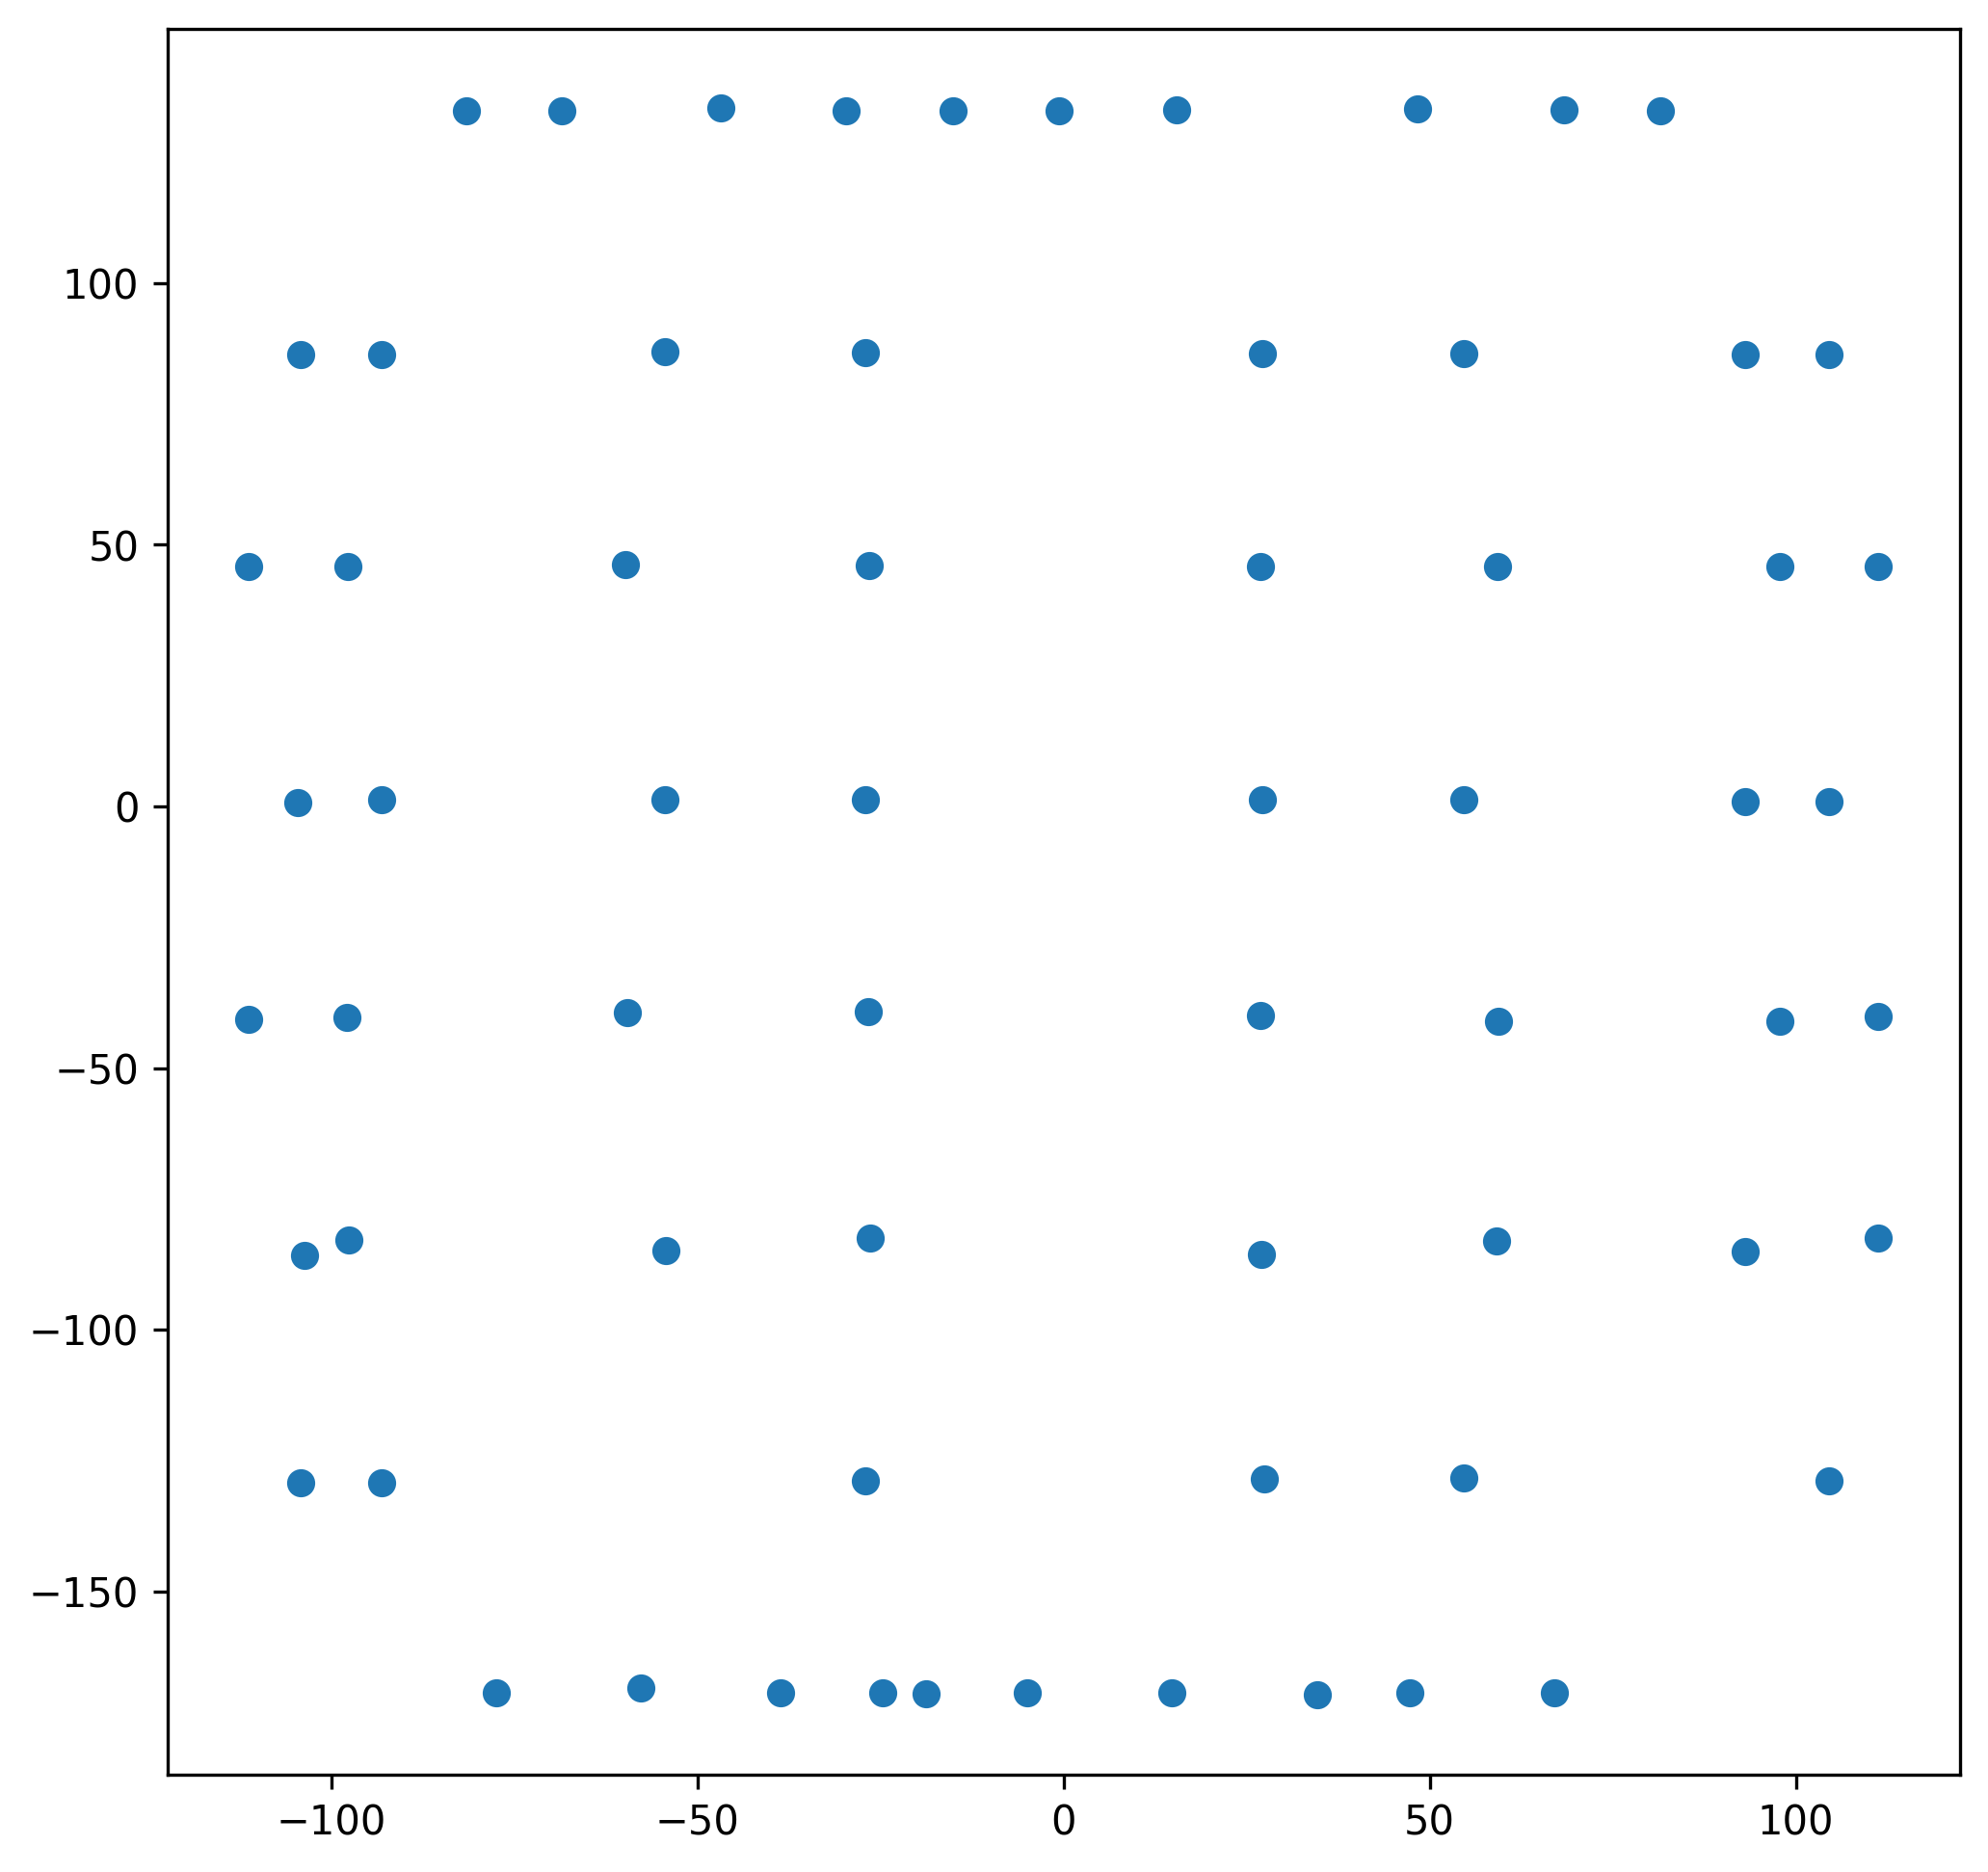

In [7]:
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

a.scatter(pmtpositions[pmtpositions[:,2] <= 168.1][:,0], pmtpositions[pmtpositions[:,2] <= 168.1][:,1])
for y in ybins:
    a.axhline(y, color="darkgrey")
a.set_xlabel("x [cm]")
a.set_ylabel("y [cm]")

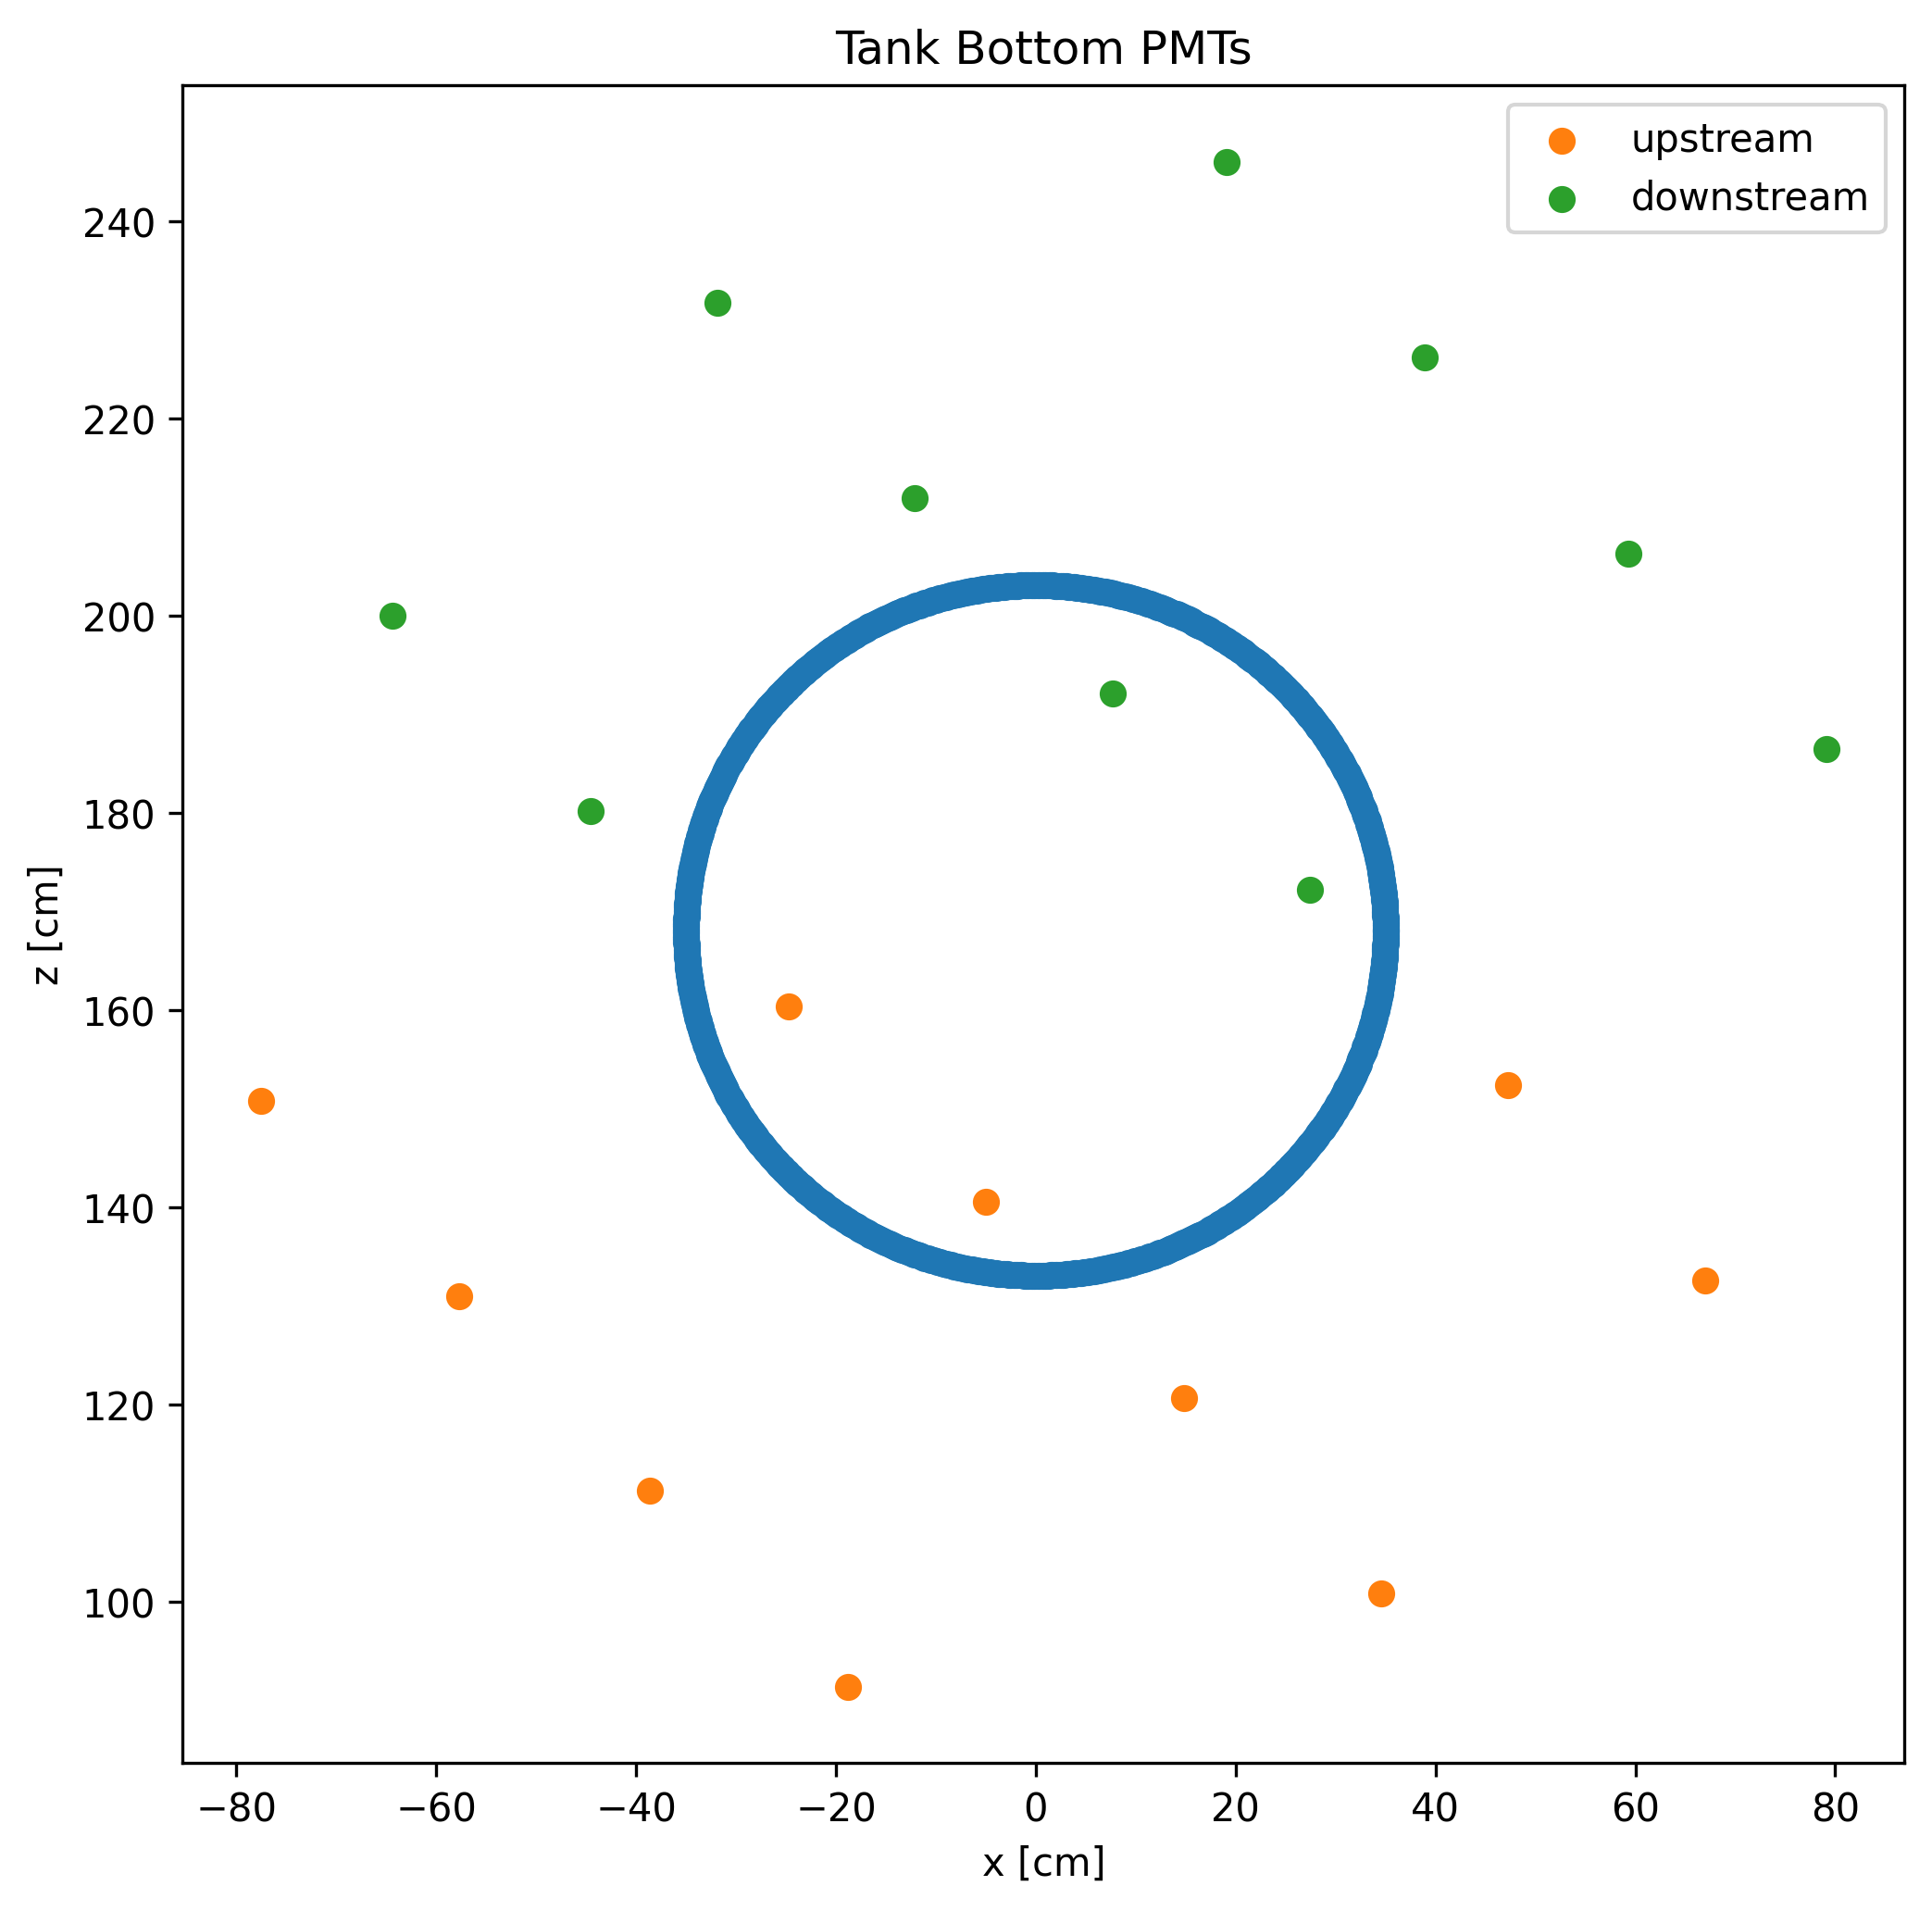

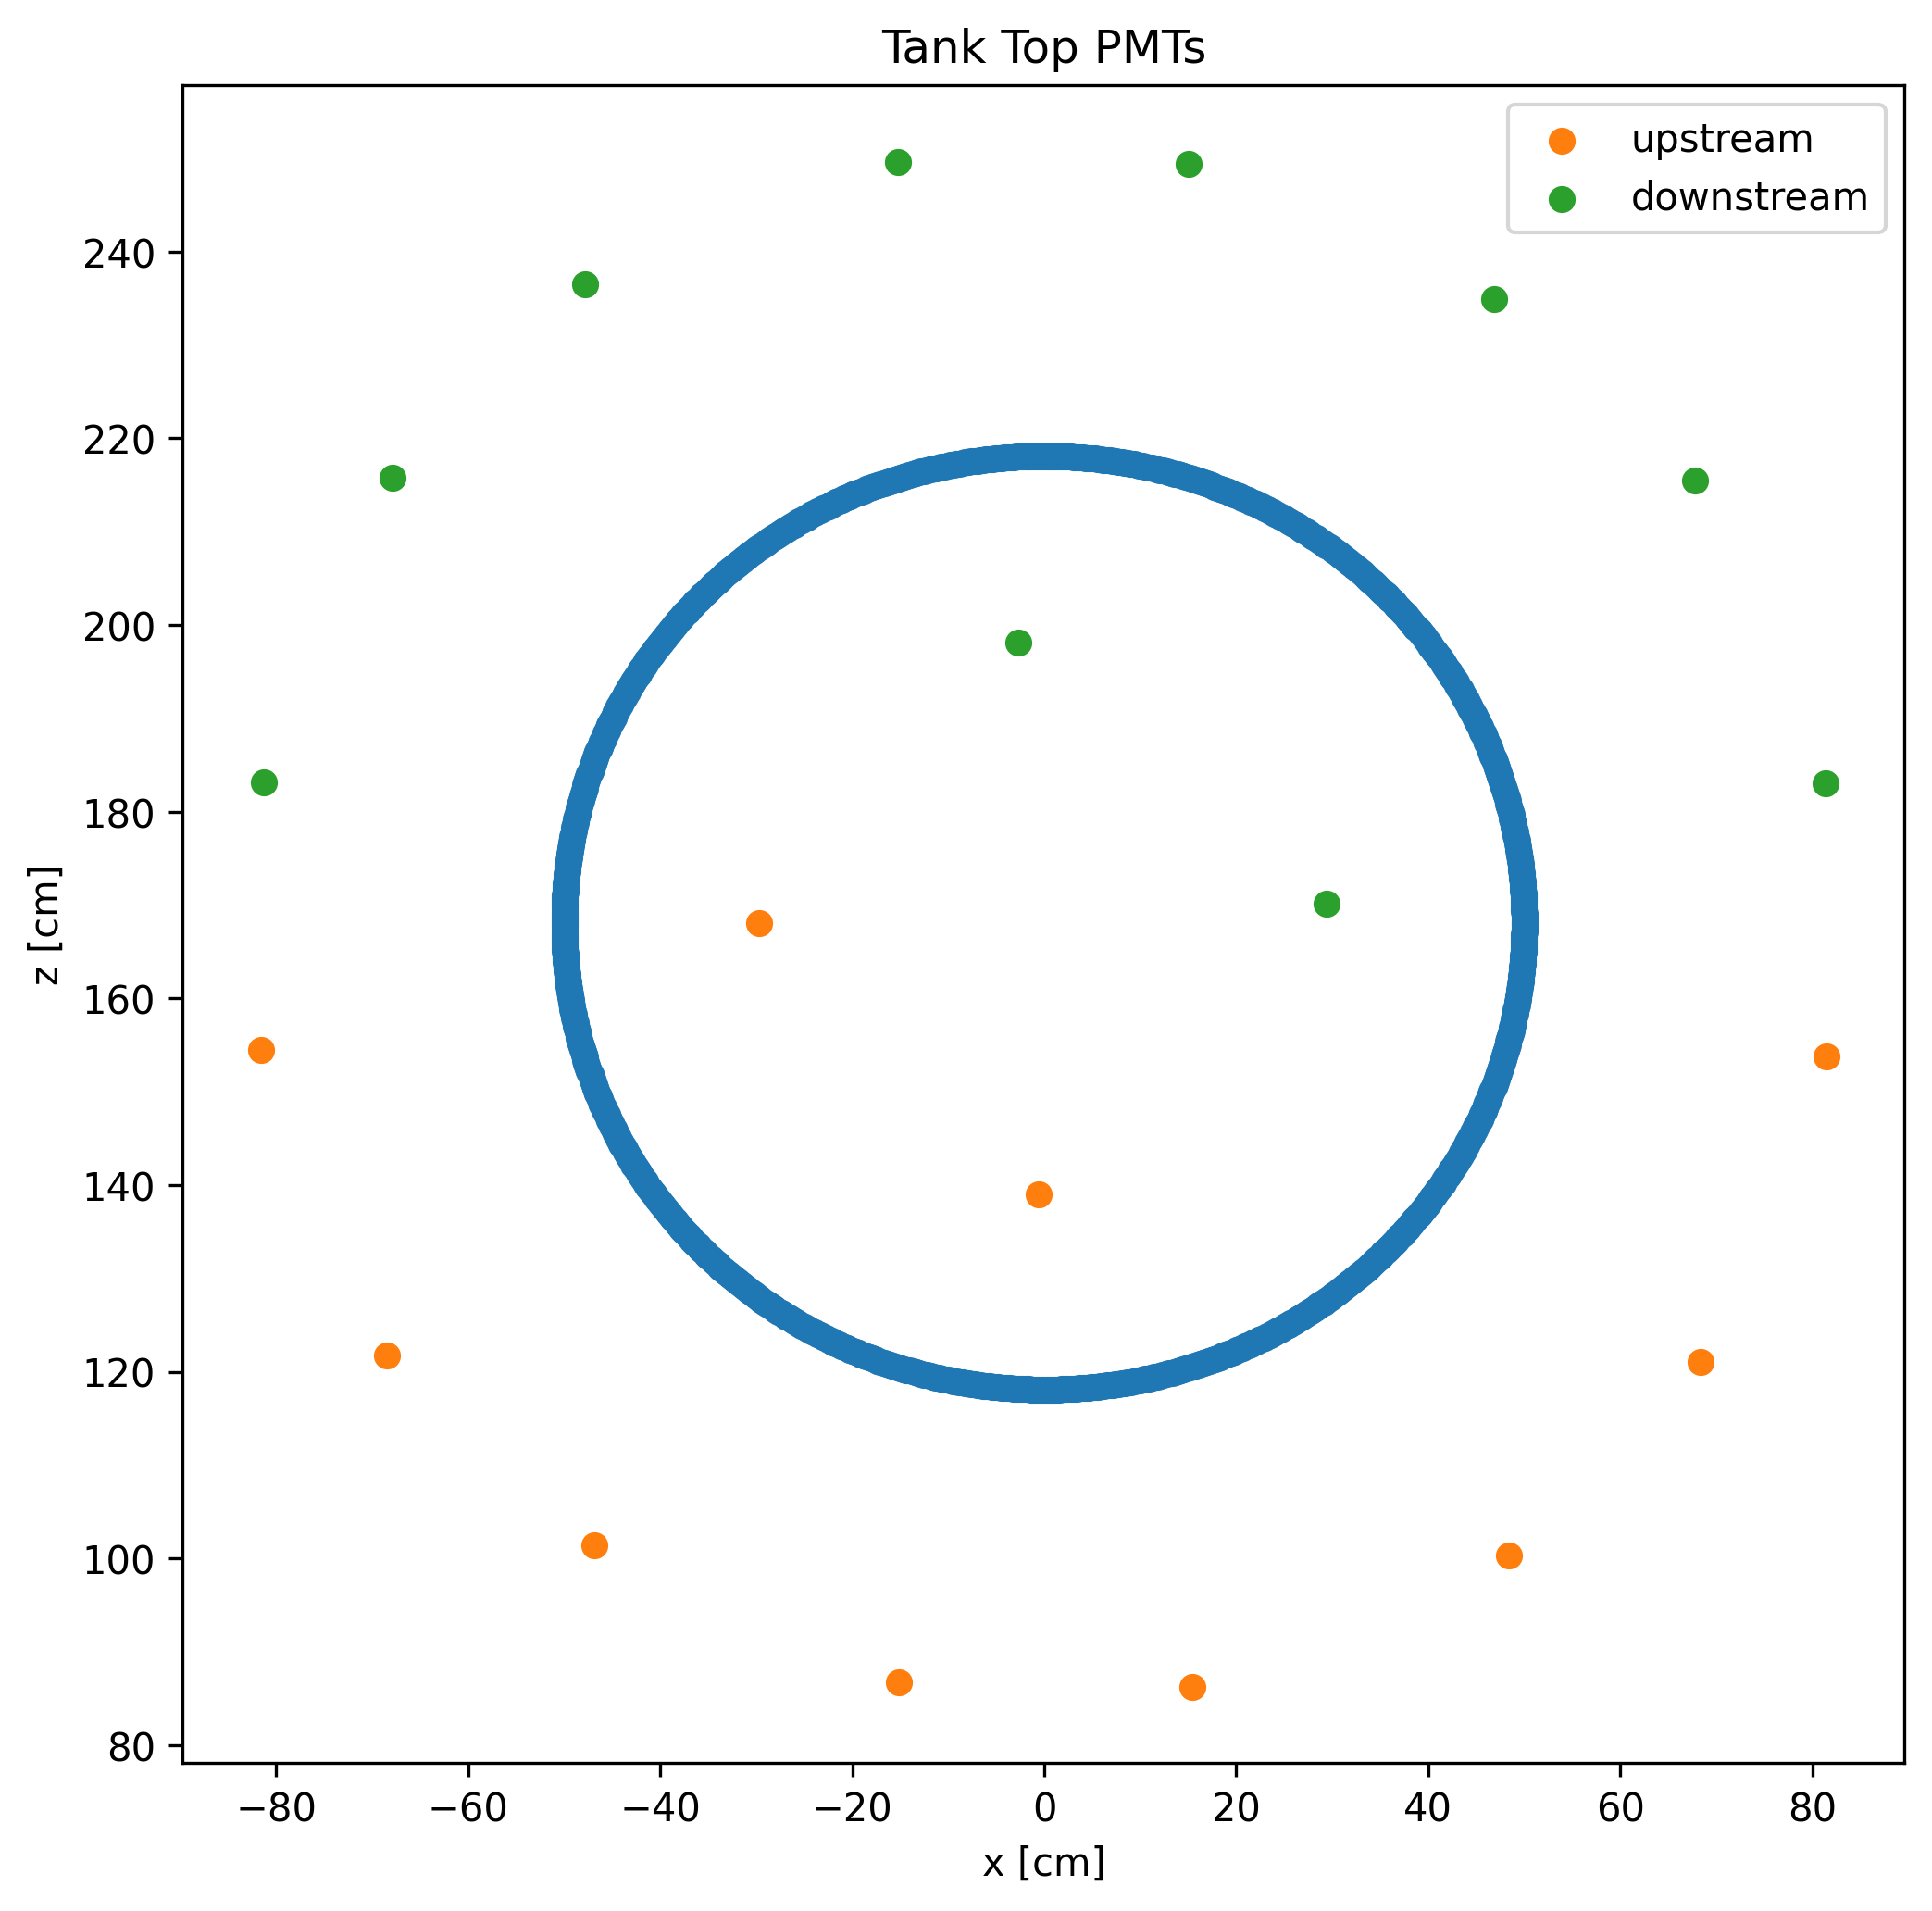

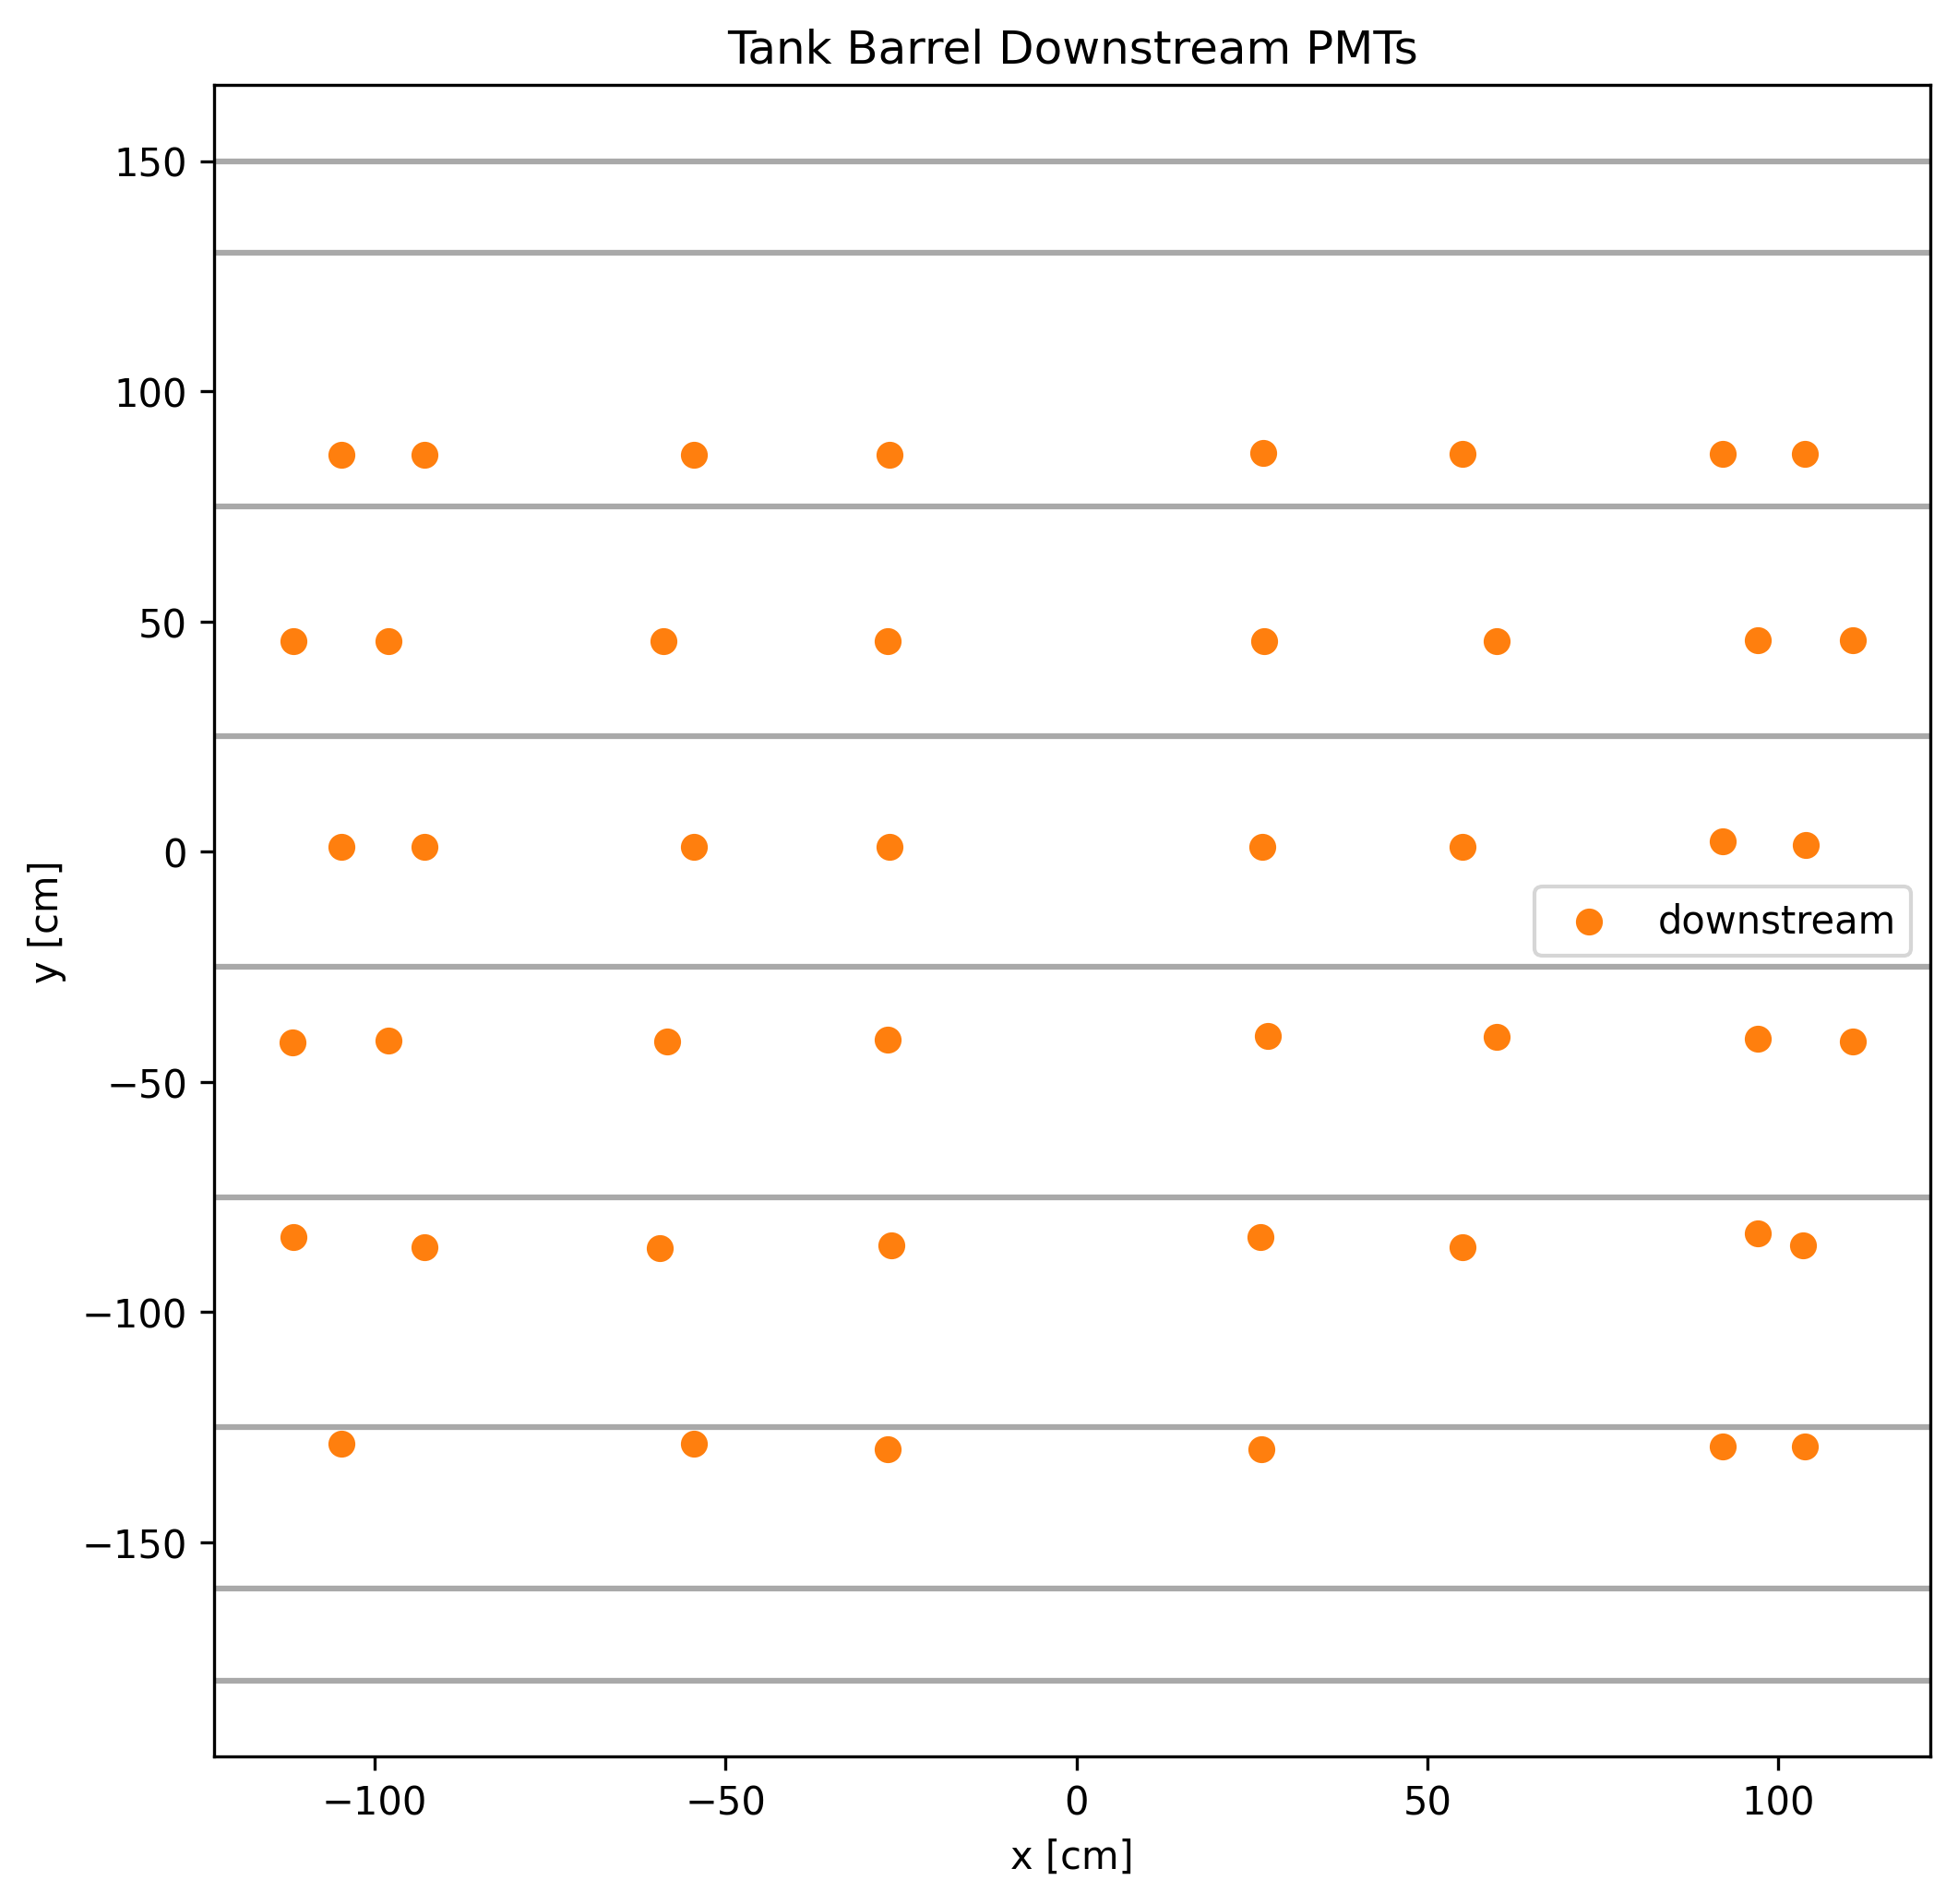

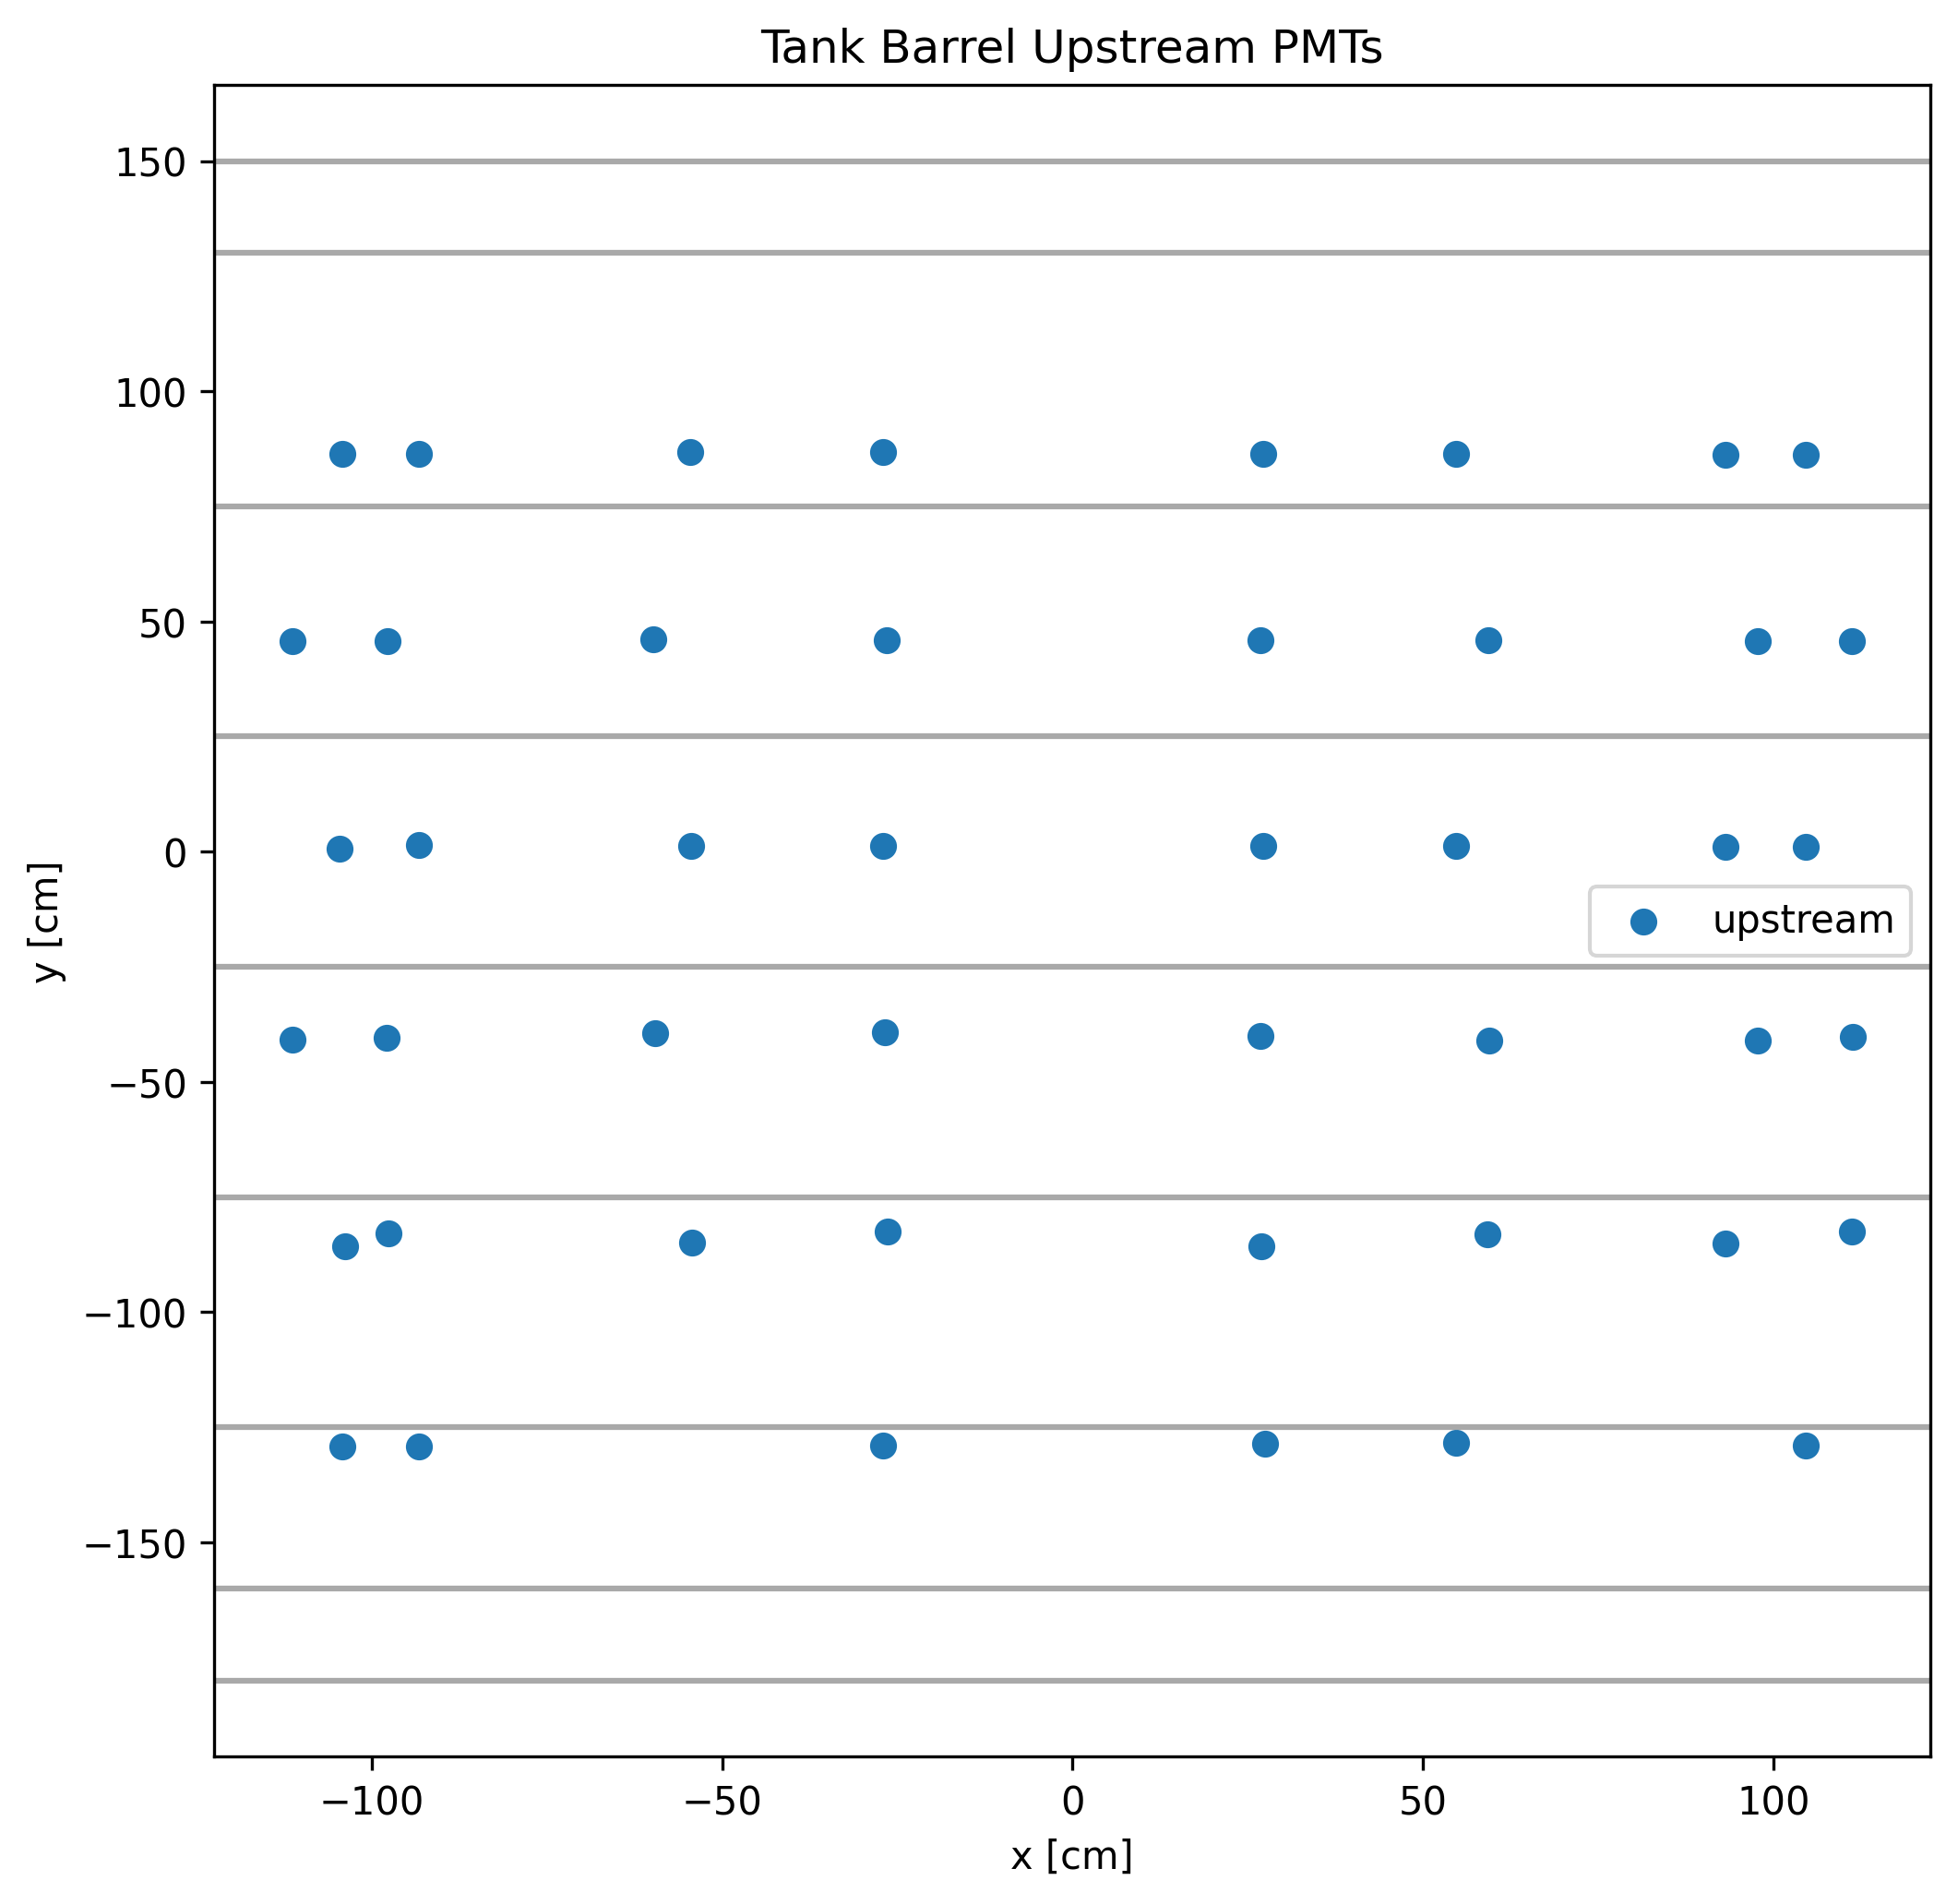

In [8]:
ybins = [
    -180,
    -160,
    -125,
    -75,
    -25,
    25, 
    75,
    130,
    150
]

phibins = np.linspace(0, 2*np.pi, 17)

ringdots = np.linspace(0, 2*np.pi, 1000)


zsel = pmtpositions[pmtpositions[:,2] < 168.1]
zselopp = pmtpositions[pmtpositions[:,2] >= 168.1]

ybarrelsel = pmtpositions[pmtpositions[:,1] <= 130]
ybarrelsel = ybarrelsel[ybarrelsel[:,1] >= -160]

# Plot tank bottom pmts + association
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

zybotsel = zsel[zsel[:,1] <= -160]
zybotselopp = zselopp[zselopp[:,1] <= -160]

a.scatter(35*np.cos(ringdots), 168.1 + 35*np.sin(ringdots))
a.scatter(zybotsel[:,0], zybotsel[:,2], label = "upstream")
a.scatter(zybotselopp[:,0], zybotselopp[:,2], label = "downstream")

a.legend()
a.set_xlabel("x [cm]")
a.set_ylabel("z [cm]")
a.set_title("Tank Bottom PMTs")

plt.show(f)

# Plot tank top pmts + association
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

zytopsel = zsel[zsel[:,1] >= 130]
zytopselopp = zselopp[zselopp[:,1] >= 130]

a.scatter(50*np.cos(ringdots), 168.1 + 50*np.sin(ringdots))
a.scatter(zytopsel[:,0], zytopsel[:,2], label = "upstream")
a.scatter(zytopselopp[:,0], zytopselopp[:,2], label = "downstream")

a.legend()
a.set_xlabel("x [cm]")
a.set_ylabel("z [cm]")
a.set_title("Tank Top PMTs")

plt.show(f)


# Plot tank downstream barrel pmts + association
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

yzdownbarrelsel = ybarrelsel[ybarrelsel[:,2] >= 168.1]


for y in ybins:
    a.axhline(y, color="darkgrey")
a.scatter(yzdownbarrelsel[:,0], yzdownbarrelsel[:,1], label = "downstream", color="C1")

a.legend()
a.set_xlabel("x [cm]")
a.set_ylabel("y [cm]")
a.set_title("Tank Barrel Downstream PMTs")

plt.show(f)


# Plot tank upstream barrel pmts + association
f,a = plt.subplots(1, 1, figsize=(8,8), dpi=300)

yzupbarrelsel = ybarrelsel[ybarrelsel[:,2] < 168.1]


for y in ybins:
    a.axhline(y, color="darkgrey")
a.scatter(yzupbarrelsel[:,0], yzupbarrelsel[:,1], label = "upstream")

a.legend()
a.set_xlabel("x [cm]")
a.set_ylabel("y [cm]")
a.set_title("Tank Barrel Upstream PMTs")

plt.show(f)

In [11]:
def calculate_phi(pmtpos):
    x = pmtpos[0]
    z = pmtpos[2] - 168.1
    rho = np.sqrt(x*x + z*z)
    
    # phi within the z/x plane
    if z >= 0:
        phi = np.arccos(x / rho)
    else:
        phi = 2 * np.pi - np.arccos(x / rho)
    # The downstream direction should be in the center of all bins, which is at an angle of pi. Thus we transform
    #    phi -> phi + pi/2
    # and map all values back into the [0, 2pi] interval.
    phi = phi + np.pi/2
    if phi > 2*np.pi:
        phi = phi - 2*np.pi
    
    return phi
    

In [12]:
combined = np.array(combined)

In [14]:
selected_pmts = combined[combined[:,1] >= ybins[0]]
selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[1]]
np.sqrt(selected_pmts[:,0] * selected_pmts[:,0] + (selected_pmts[:,2] - 168.1) * (selected_pmts[:,2] - 168.1)) < 70

array([False,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False])

In [52]:
mapping = []

selected_pmts = combined[combined[:,1] >= ybins[0]]
selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[1]]
mask = np.sqrt(selected_pmts[:,0] * selected_pmts[:,0] \
               + (selected_pmts[:,2] - 168.1) * (selected_pmts[:,2] - 168.1)
              ) < 35
selected_pmts = selected_pmts[mask]
print("y: ", 0, "    number of PMTs ", len(selected_pmts))
for p in selected_pmts:
        print(
        f"phi = {calculate_phi(p):.3f},", f"  detkey = {int(p[3])},", "  phibin = ", np.digitize(calculate_phi(p), phibins)
        )
        mapping.append([int(p[3]), np.digitize(calculate_phi(p), phibins), 0])
        
        
selected_pmts = combined[combined[:,1] >= ybins[0]]
selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[1]]
mask = np.sqrt(selected_pmts[:,0] * selected_pmts[:,0] \
               + (selected_pmts[:,2] - 168.1) * (selected_pmts[:,2] - 168.1)
              ) > 35
selected_pmts = selected_pmts[mask]
print("y: ", 1, "    number of PMTs ", len(selected_pmts))
for p in selected_pmts:
        print(
        f"phi = {calculate_phi(p):.3f},", f"  detkey = {int(p[3])},", "  phibin = ", np.digitize(calculate_phi(p), phibins)
        )
        mapping.append([int(p[3]), np.digitize(calculate_phi(p), phibins), 1])
        
        
for y in range(1, len(ybins) - 2):
    selected_pmts = combined[combined[:,1] >= ybins[y]]
    selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[y+1]]
    
    print("y: ", y+1, "    number of PMTs ", len(selected_pmts))
    for p in selected_pmts:
        print(
        f"phi = {calculate_phi(p):.3f},", f"  detkey = {int(p[3])},", "  phibin = ", np.digitize(calculate_phi(p), phibins)
        )
        mapping.append([int(p[3]), np.digitize(calculate_phi(p), phibins), y+1])
        

selected_pmts = combined[combined[:,1] >= ybins[-2]]
selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[-1]]
mask = np.sqrt(selected_pmts[:,0] * selected_pmts[:,0] \
               + (selected_pmts[:,2] - 168.1) * (selected_pmts[:,2] - 168.1)
              ) > 50
selected_pmts = selected_pmts[mask]
print("y: ", 8, "    number of PMTs ", len(selected_pmts))
for p in selected_pmts:
        print(
        f"phi = {calculate_phi(p):.3f},", f"  detkey = {int(p[3])},", "  phibin = ", np.digitize(calculate_phi(p), phibins)
        )
        mapping.append([int(p[3]), np.digitize(calculate_phi(p), phibins), 8])
        
        
selected_pmts = combined[combined[:,1] >= ybins[-2]]
selected_pmts = selected_pmts[selected_pmts[:,1] < ybins[-1]]
mask = np.sqrt(selected_pmts[:,0] * selected_pmts[:,0] \
               + (selected_pmts[:,2] - 168.1) * (selected_pmts[:,2] - 168.1)
              ) < 50
selected_pmts = selected_pmts[mask]
print("y: ", 9, "    number of PMTs ", len(selected_pmts))
for p in selected_pmts:
        print(
        f"phi = {calculate_phi(p):.3f},", f"  detkey = {int(p[3])},", "  phibin = ", np.digitize(calculate_phi(p), phibins)
        )
        mapping.append([int(p[3]), np.digitize(calculate_phi(p), phibins), 9])

y:  0     number of PMTs  4
phi = 5.015,   detkey = 333,   phibin =  13
phi = 2.832,   detkey = 338,   phibin =  8
phi = 6.104,   detkey = 344,   phibin =  16
phi = 1.721,   detkey = 347,   phibin =  5
y:  1     number of PMTs  16
phi = 4.251,   detkey = 332,   phibin =  11
phi = 4.932,   detkey = 334,   phibin =  13
phi = 4.447,   detkey = 335,   phibin =  12
phi = 5.283,   detkey = 336,   phibin =  14
phi = 2.901,   detkey = 337,   phibin =  8
phi = 3.606,   detkey = 339,   phibin =  10
phi = 2.552,   detkey = 340,   phibin =  7
phi = 3.411,   detkey = 341,   phibin =  9
phi = 6.042,   detkey = 342,   phibin =  16
phi = 0.303,   detkey = 343,   phibin =  1
phi = 0.475,   detkey = 345,   phibin =  2
phi = 5.687,   detkey = 346,   phibin =  15
phi = 2.143,   detkey = 348,   phibin =  6
phi = 1.250,   detkey = 349,   phibin =  4
phi = 1.799,   detkey = 350,   phibin =  5
phi = 1.083,   detkey = 351,   phibin =  3
y:  2     number of PMTs  12
phi = 4.473,   detkey = 417,   phibin =  12
p

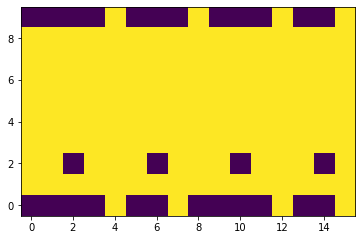

In [21]:
mapping = np.array(mapping)
mask = np.zeros(160)
for i in mapping:
    mask[i[1] - 1 + 16 * i[2]] = 1

plt.imshow(mask.reshape((10,16)), origin="lower")

In [38]:
mapping = np.array([[i[0]-308, i[1]-1, i[2]] for i in mapping])

In [42]:
mapping

array([[ 25,  12,   0],
       [ 30,   7,   0],
       [ 36,  15,   0],
       [ 39,   4,   0],
       [ 24,  10,   1],
       [ 26,  12,   1],
       [ 27,  11,   1],
       [ 28,  13,   1],
       [ 29,   7,   1],
       [ 31,   9,   1],
       [ 32,   6,   1],
       [ 33,   8,   1],
       [ 34,  15,   1],
       [ 35,   0,   1],
       [ 37,   1,   1],
       [ 38,  14,   1],
       [ 40,   5,   1],
       [ 41,   3,   1],
       [ 42,   4,   1],
       [ 43,   2,   1],
       [109,  11,   2],
       [110,  13,   2],
       [119,  12,   2],
       [121,   8,   2],
       [123,   7,   2],
       [125,   1,   2],
       [126,   0,   2],
       [128,  15,   2],
       [136,   9,   2],
       [144,   5,   2],
       [145,   4,   2],
       [146,   3,   2],
       [ 66,   5,   3],
       [ 71,   3,   3],
       [ 77,  15,   3],
       [ 84,   1,   3],
       [ 87,  11,   3],
       [ 91,  13,   3],
       [100,   9,   3],
       [106,   7,   3],
       [111,  12,   3],
       [112,  10

In [53]:
with open('data_cnnimage_mapping.csv', 'w') as f:
    for i in mapping:
        f.write(f"{i[0]} {i[1]} {i[2]}\n")